# Лабораторная работа №2 (Pandas)
## Выполнил Неженский Михаил Сергеевич, 6133-010402D

In [1]:
import pandas as pd
import numpy as np

Используемый в работе набор данных: https://www.kaggle.com/datasets/saadatkhalid/top-500-popular-movies

In [2]:
top = 'data/top_popular_movies.csv'

In [3]:
data = pd.read_csv(top)

In [4]:
data.head()

,title,release_date,popularity,vote_average
0,Avatar: The Way of Water,2022-12-14,6789.789,7.7
1,Winnie the Pooh: Blood and Honey,2023-01-27,3258.540,5.9
2,Cocaine Bear,2023-02-22,2781.045,6.6
3,John Wick: Chapter 4,2023-03-22,2803.482,8.2
4,Puss in Boots: The Last Wish,2022-12-07,1531.792,8.3


In [5]:
pd.DataFrame([data.columns, data.dtypes], index=['Column Name', 'Column Type']).T

,Column Name,Column Type
0,title,object
1,release_date,object
2,popularity,float64
3,vote_average,float64


In [6]:
data = data[['popularity','vote_average']]

### Задание 2
Совершаете с датафреймом следующие операции
#### 2.1 .head()

In [7]:
data.head()

,popularity,vote_average
0,6789.789,7.7
1,3258.540,5.9
2,2781.045,6.6
3,2803.482,8.2
4,1531.792,8.3


#### 2.2 .describe()

In [8]:
data.describe()

,popularity,vote_average
count,500.000000,500.000000
mean,242.875816,6.716000
std,420.643519,1.379881
min,63.358000,0.000000
25%,102.452250,6.300000
50%,133.738500,6.900000
75%,229.091500,7.500000
max,6789.789000,10.000000


#### 2.3 Считайте значение конкретной ячейки (с конкретным индексом из конкретной колонки)

In [9]:
data.loc[0, 'vote_average']

7.7

In [10]:
data.iloc[0, 0]

6789.789

#### 2.4 Фильтрация строк по диапазону индекса

In [11]:
data.take(slice(1, 3))

,popularity,vote_average
1,3258.540,5.9
2,2781.045,6.6


In [12]:
data.loc[1:2]

,popularity,vote_average
1,3258.540,5.9
2,2781.045,6.6


#### 2.5 Фильтрация набора данных по какому-либо условию

In [13]:
data.loc[data['vote_average'] == 5.9].head(9)

,popularity,vote_average
1,3258.540,5.9
109,229.049,5.9
140,209.447,5.9
155,183.320,5.9
178,180.010,5.9
199,144.964,5.9
215,149.291,5.9
247,132.540,5.9
266,115.765,5.9


#### 2.6. Работа с пропущенными значениями (если они есть): удаление строк с пропущенными значениями, заполнение пропущенных значений средним значением по колонке. Если пропущенных значений нет — намеренно их "генерируете", прибивая какие-то куски данных в np.nan

In [14]:
data.fillna(0).head(1)

,popularity,vote_average
0,6789.789,7.7


In [15]:
data.replace(np.NAN, 0).head(1)

,popularity,vote_average
0,6789.789,7.7


#### 2.7 Cоздание нового поля вычисленного на основе значений других полей:
##### 2.8 Через выражение на базе имеющихся колонок

In [16]:
data['popularity_1'] = data['popularity']
data.head(1).T

,0
popularity,6789.789
vote_average,7.700
popularity_1,6789.789


##### 2.9 Через DataFrame.apply

In [17]:
data['Trash'] = data.apply(lambda x: x['vote_average'] / 10, axis=1)

##### 2.10 Через DataFrame.apply

In [18]:
data['vote_average^2'] = data['vote_average'].apply(lambda x: x ** 2)

In [19]:
data.head()

,popularity,vote_average,popularity_1,Trash,vote_average^2
0,6789.789,7.7,6789.789,0.77,59.29
1,3258.540,5.9,3258.540,0.59,34.81
2,2781.045,6.6,2781.045,0.66,43.56
3,2803.482,8.2,2803.482,0.82,67.24
4,1531.792,8.3,1531.792,0.83,68.89


#### 2.11 Cортировка по какому-либо из полей

In [20]:
data.fillna(0).sort_values('vote_average', ascending=False).head(10)

,popularity,vote_average,popularity_1,Trash,vote_average^2
438,134.742,10.0,134.742,1.00,100.00
421,100.525,8.7,100.525,0.87,75.69
292,110.125,8.6,110.125,0.86,73.96
165,177.959,8.5,177.959,0.85,72.25
396,96.833,8.5,96.833,0.85,72.25
465,86.927,8.5,86.927,0.85,72.25
420,97.850,8.5,97.850,0.85,72.25
271,110.886,8.5,110.886,0.85,72.25
359,96.582,8.4,96.582,0.84,70.56
217,137.527,8.4,137.527,0.84,70.56


#### 2.12.1 Вычислить несколько статистик по колонкам 

In [21]:
data['vote_average'].min(), data['vote_average'].max(), data['vote_average'].mean(), data['vote_average'].std()

(0.0, 10.0, 6.716, 1.3798812065857615)

##### 2.12.2 .value_counts()

In [22]:
data.value_counts()

popularity  vote_average  popularity_1  Trash  vote_average^2
63.358      0.0           63.358        0.00   0.00              1
173.343     7.7           173.343       0.77   59.29             1
180.349     4.7           180.349       0.47   22.09             1
180.214     6.6           180.214       0.66   43.56             1
180.010     5.9           180.010       0.59   34.81             1
                                                                ..
109.022     7.1           109.022       0.71   50.41             1
108.853     8.0           108.853       0.80   64.00             1
108.843     6.4           108.843       0.64   40.96             1
108.590     6.2           108.590       0.62   38.44             1
6789.789    7.7           6789.789      0.77   59.29             1
Name: count, Length: 500, dtype: int64

#### 2.13 Если значений немного — вывод уникальных значений какой-либо колонки через .unique()

In [23]:
data['vote_average'].unique()

array([ 7.7,  5.9,  6.6,  8.2,  8.3,  6.2,  6.4,  7.3,  6.9,  7.4,  6.3,
        5.8,  6.1,  0. ,  7.1,  5.3,  6. ,  5.1,  5.6,  7. ,  5.2,  7.9,
        5.7,  4.5,  8. ,  7.6,  6.5,  6.7,  6.8,  5.5,  7.2,  7.8,  5. ,
        5.4,  4.8,  7.5,  4.9,  4.7,  2. ,  8.5,  3. ,  4.4,  4.3,  8.1,
        8.4,  2.5,  8.6,  2.7,  8.7, 10. ,  3.5])

#### 2.14 Удалите текущий индекс и создайте новый индекс на базе новой колонки, которая для этого лучше всего подходит

In [24]:
data.index = data['popularity']

In [25]:
data.head()

,popularity,vote_average,popularity_1,Trash,vote_average^2
popularity,,,,,
6789.789,6789.789,7.7,6789.789,0.77,59.29
3258.540,3258.540,5.9,3258.540,0.59,34.81
2781.045,2781.045,6.6,2781.045,0.66,43.56
2803.482,2803.482,8.2,2803.482,0.82,67.24
1531.792,1531.792,8.3,1531.792,0.83,68.89


### 3. GroupBy
Продемонстрировать работу .groupby, на основе группировок в groupby вычисляете агрегатные функции по одной или нескольким колонкам

In [26]:
result = data[['popularity','vote_average']]\
    .groupby('vote_average')\
    .mean()\
    .sort_values('popularity', ascending=False)\
    .rename(columns={'popularity': 'Average popularity'})


In [27]:
result.head(5)

,Average popularity
vote_average,
5.2,580.235000
7.7,532.809588
8.2,472.314000
5.1,396.381333
4.5,393.048000


In [28]:
data

,popularity,vote_average,popularity_1,Trash,vote_average^2
popularity,,,,,
6789.789,6789.789,7.7,6789.789,0.77,59.29
3258.540,3258.540,5.9,3258.540,0.59,34.81
2781.045,2781.045,6.6,2781.045,0.66,43.56
2803.482,2803.482,8.2,2803.482,0.82,67.24
1531.792,1531.792,8.3,1531.792,0.83,68.89
...,...,...,...,...,...
85.359,85.359,0.0,85.359,0.00,0.00
86.922,86.922,6.9,86.922,0.69,47.61
78.885,78.885,6.2,78.885,0.62,38.44


### 4. Pivot

Решейпинг данных 1Dto2D с помощью .pivot (можно подать на вход результаты агрегатов, полученных ранее через .groupby (сгруппировать по двум полям), либо прекрасно заходит сюда данные из SQL сгруппированные предварительно по 2-м полям)

In [29]:
data[['popularity','vote_average']].groupby('vote_average').mean().pivot(columns='popularity', values='popularity')

popularity,76.959000,97.303800,98.724000,100.525000,110.125000,114.091000,132.682050,133.771000,134.742000,135.236000,...,362.878632,364.526857,366.113600,376.229600,389.009000,393.048000,396.381333,472.314000,532.809588,580.235000
vote_average,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.7,76.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.5,NaN,NaN,98.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,393.048,NaN,NaN,NaN,NaN


In [30]:
data

,popularity,vote_average,popularity_1,Trash,vote_average^2
popularity,,,,,
6789.789,6789.789,7.7,6789.789,0.77,59.29
3258.540,3258.540,5.9,3258.540,0.59,34.81
2781.045,2781.045,6.6,2781.045,0.66,43.56
2803.482,2803.482,8.2,2803.482,0.82,67.24
1531.792,1531.792,8.3,1531.792,0.83,68.89
...,...,...,...,...,...
85.359,85.359,0.0,85.359,0.00,0.00
86.922,86.922,6.9,86.922,0.69,47.61
78.885,78.885,6.2,78.885,0.62,38.44


### 5. Pivot_table

Решейпинг 1Dto2D данных соединённый с группировкой / агрегацией (одним словом — сводная таблица): .pivot_table. Группируем только по категориальным полям или числовым, если уверены, что значений немного! Если значений много, можете вначале из загрубить (см. (2.7.) либо (7))

In [31]:
pd.pivot_table(data[['vote_average', 'Trash', 'popularity', 'popularity_1', 'vote_average^2']], index='vote_average')

,Trash,popularity,popularity_1,vote_average^2
vote_average,,,,
0.0,0.00,197.457273,197.457273,0.00
2.0,0.20,206.496000,206.496000,4.00
2.5,0.25,137.485000,137.485000,6.25
2.7,0.27,76.959000,76.959000,7.29
3.0,0.30,163.820000,163.820000,9.00
3.5,0.35,98.724000,98.724000,12.25
4.3,0.43,138.309333,138.309333,18.49
4.4,0.44,174.320000,174.320000,19.36
4.5,0.45,393.048000,393.048000,20.25


### 6. Quantile

Посчитать квантили распределения какого-либо вещественного признака (с помощью numpy.quantile или numpy.percentile)

In [32]:
np.quantile(data['vote_average'].fillna(0), 0.5)

6.9

### 7. Histogram

Посчитать (в виде текста) гистограмму какого-либо вещественного признака (с помощью numpy.histogram). Значения гистограммы можете использовать как вариант в качестве загрубленного числового признака для заданий (4) или (5).

In [33]:
import matplotlib.pyplot as plt

(array([ 11.,   0.,   3.,   2.,  11.,  53., 176., 201.,  42.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

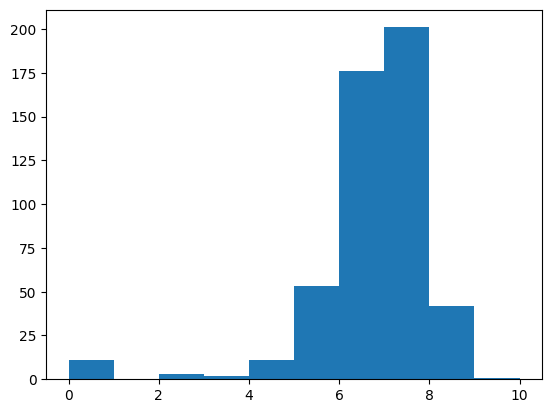

In [34]:
plt.hist(data['vote_average'])

### 8. Получить DataFrame с MultiIndex любым способом: через конструктор (в документации увидите множество видов конструкторов для создания MultiIndex с нуля), через read_sql / read_csv / readexcel, read*, через pivot_table, через groupby или иными способами.


In [35]:
multi_indexed_data = data[['vote_average', 'Trash', 'popularity', 'popularity_1', 'vote_average^2']].groupby(['vote_average', 'vote_average^2']).mean()
multi_indexed_data.head()

,,Trash,popularity,popularity_1
vote_average,vote_average^2,,,
0.0,0.00,0.00,197.457273,197.457273
2.0,4.00,0.20,206.496000,206.496000
2.5,6.25,0.25,137.485000,137.485000
2.7,7.29,0.27,76.959000,76.959000
3.0,9.00,0.30,163.820000,163.820000


#### 8.1. Переставить местами уровни индекса

In [36]:
multi_indexed_data.swaplevel().head()

,,Trash,popularity,popularity_1
vote_average^2,vote_average,,,
0.00,0.0,0.00,197.457273,197.457273
4.00,2.0,0.20,206.496000,206.496000
6.25,2.5,0.25,137.485000,137.485000
7.29,2.7,0.27,76.959000,76.959000
9.00,3.0,0.30,163.820000,163.820000


In [37]:
multi_indexed_data.swaplevel().sort_index().head()

,,Trash,popularity,popularity_1
vote_average^2,vote_average,,,
0.00,0.0,0.00,197.457273,197.457273
4.00,2.0,0.20,206.496000,206.496000
6.25,2.5,0.25,137.485000,137.485000
7.29,2.7,0.27,76.959000,76.959000
9.00,3.0,0.30,163.820000,163.820000


#### 8.2. Транспонировать таблицу (или создать новую другую) с MultiIndex

In [38]:
multi_indexed_data.T.head()

vote_average,0.0,2.0,2.5,2.7,3.0,3.5,4.3,4.4,4.5,4.7,...,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,10.0
vote_average^2,0.00,4.00,6.25,7.29,9.00,12.25,18.49,19.36,20.25,22.09,...,62.41,64.00,65.61,67.24,68.89,70.56,72.25,73.96,75.69,100.00
Trash,0.000000,0.200,0.250,0.270,0.30,0.350,0.430000,0.44,0.450,0.470,...,0.790000,0.800000,0.810,0.820,0.8300,0.8400,0.850,0.860,0.870,1.000
popularity,197.457273,206.496,137.485,76.959,163.82,98.724,138.309333,174.32,393.048,180.349,...,196.210556,193.184625,133.771,472.314,366.1136,97.3038,114.091,110.125,100.525,134.742
popularity_1,197.457273,206.496,137.485,76.959,163.82,98.724,138.309333,174.32,393.048,180.349,...,196.210556,193.184625,133.771,472.314,366.1136,97.3038,114.091,110.125,100.525,134.742


#### 8.3. Удалить один из уровней индекса или добавить новый уровень индекса (можно инициализированный константой)

In [39]:
multi_indexed_data.reset_index(level=0)

,vote_average,Trash,popularity,popularity_1
vote_average^2,,,,
0.00,0.0,0.00,197.457273,197.457273
4.00,2.0,0.20,206.496000,206.496000
6.25,2.5,0.25,137.485000,137.485000
7.29,2.7,0.27,76.959000,76.959000
9.00,3.0,0.30,163.820000,163.820000
12.25,3.5,0.35,98.724000,98.724000
18.49,4.3,0.43,138.309333,138.309333
19.36,4.4,0.44,174.320000,174.320000
20.25,4.5,0.45,393.048000,393.048000


### 9. Продемонстировать работу .merge

In [40]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [41]:
df1.merge(df2, how='outer')

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


### 10. Продемонстрировать работу с .concat или append

In [42]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'b': [3, 4]})

In [43]:
pd.concat([df1, df2], axis=0, ignore_index=True)

,a,b
0,foo,1
1,bar,2
2,foo,3
3,baz,4


### 11. Проитерировать dataframe построчно .iterrows(). Выполните что-то имеющее смысл внутри цикла

In [51]:
classes = np.arange(1, 100).tolist()
for i, (index, row) in enumerate(data.iterrows()):
    if row['vote_average^2'] not in classes:
        print(f'Наверно хороший фильм, если он {500-i} по рейтенгу')

Наверно хороший фильм, если он 500 по рейтенгу
Наверно хороший фильм, если он 499 по рейтенгу
Наверно хороший фильм, если он 498 по рейтенгу
Наверно хороший фильм, если он 497 по рейтенгу
Наверно хороший фильм, если он 496 по рейтенгу
Наверно хороший фильм, если он 495 по рейтенгу
Наверно хороший фильм, если он 494 по рейтенгу
Наверно хороший фильм, если он 493 по рейтенгу
Наверно хороший фильм, если он 492 по рейтенгу
Наверно хороший фильм, если он 491 по рейтенгу
Наверно хороший фильм, если он 490 по рейтенгу
Наверно хороший фильм, если он 489 по рейтенгу
Наверно хороший фильм, если он 488 по рейтенгу
Наверно хороший фильм, если он 487 по рейтенгу
Наверно хороший фильм, если он 486 по рейтенгу
Наверно хороший фильм, если он 485 по рейтенгу
Наверно хороший фильм, если он 484 по рейтенгу
Наверно хороший фильм, если он 483 по рейтенгу
Наверно хороший фильм, если он 482 по рейтенгу
Наверно хороший фильм, если он 481 по рейтенгу
Наверно хороший фильм, если он 480 по рейтенгу
Наверно хорош